# Multiple Linear Regression

# Importing the Libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Dataset

In [31]:
dataset = pd.read_csv('melbourne_housing_full.csv')

In [32]:
dataset

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


## Taking care of Missing data

In [33]:
dataset.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [34]:
col_to_drop = ['Address','Postcode','Date','Lattitude','Longtitude','YearBuilt']

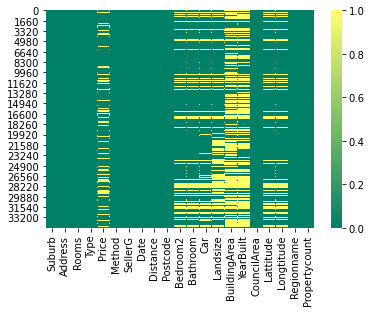

In [35]:
sns.heatmap(dataset.isna(),cbar=True,cmap='summer')
plt.show()

In [36]:
dataset = dataset.drop(col_to_drop,axis=1)

In [37]:
dataset.isna().sum()

Suburb               0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Distance             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
CouncilArea          3
Regionname           3
Propertycount        3
dtype: int64

In [38]:
col_to_fill = ['Price','Distance','Bedroom2','BuildingArea','Bathroom','Car','Landsize','CouncilArea','Regionname','Propertycount']
dataset = dataset.fillna(dataset[col_to_fill].mean())

In [39]:
dataset.isna().sum()

Suburb           0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Distance         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
CouncilArea      3
Regionname       3
Propertycount    0
dtype: int64

In [40]:
dataset = dataset.fillna(0)

In [41]:
dataset.isna().sum()

Suburb           0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Distance         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
CouncilArea      0
Regionname       0
Propertycount    0
dtype: int64

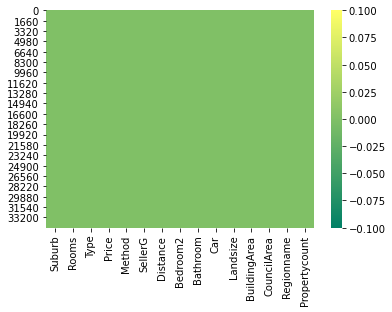

In [42]:
sns.heatmap(dataset.isna(),cbar=True,cmap='summer')
plt.show()

## Visualising the Data

### Scatter Plot

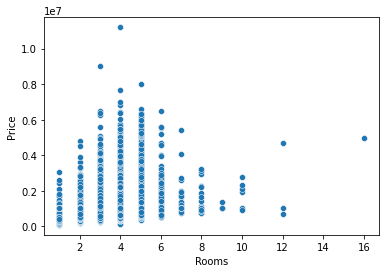

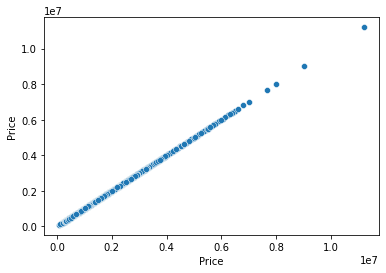

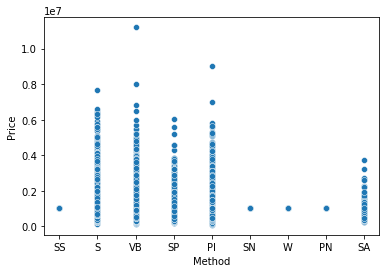

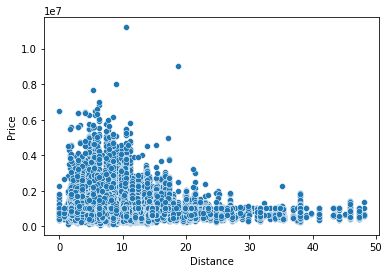

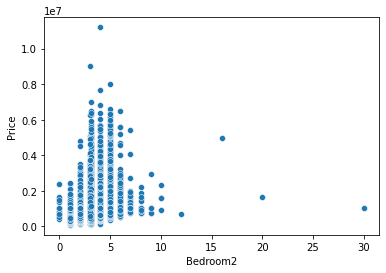

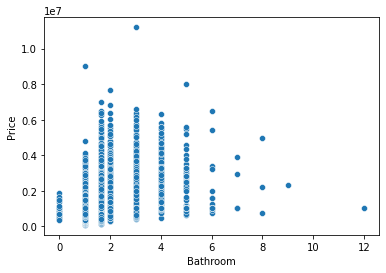

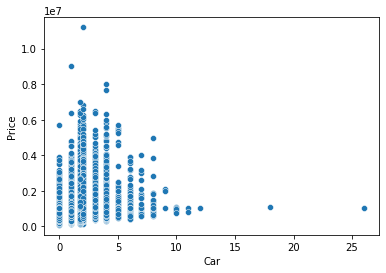

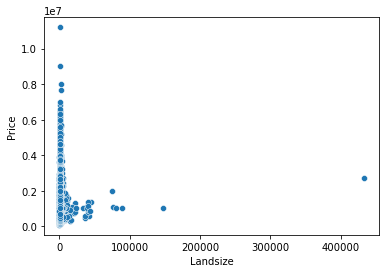

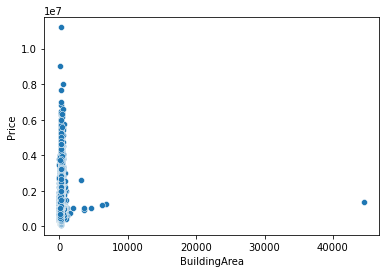

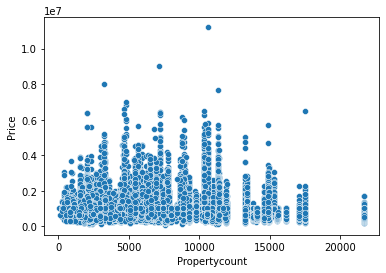

In [43]:
data = dataset.drop(['Suburb','Type','SellerG','Regionname','CouncilArea'],axis = 1)
for i in data:
    sns.scatterplot(x = i,y = 'Price',data = dataset)
    plt.show()

### Regression Plot

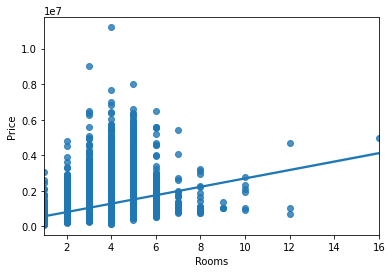

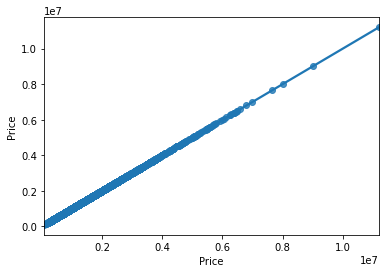

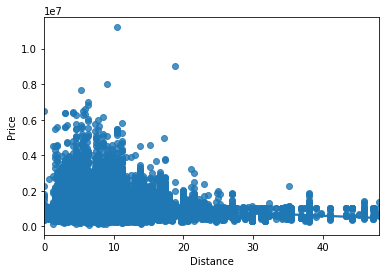

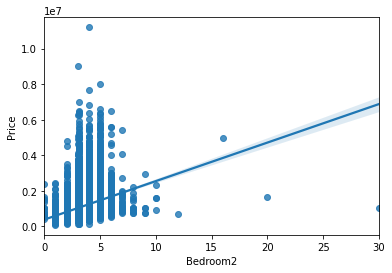

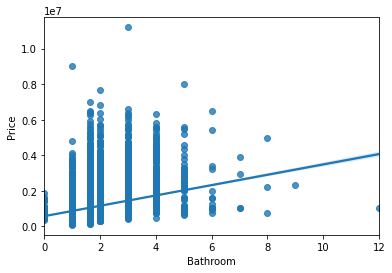

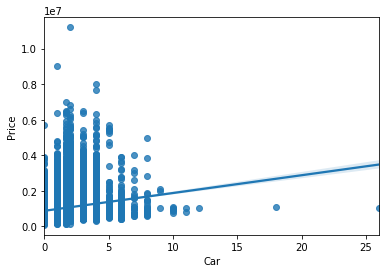

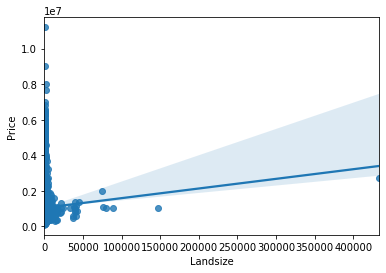

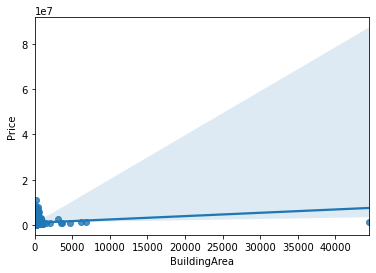

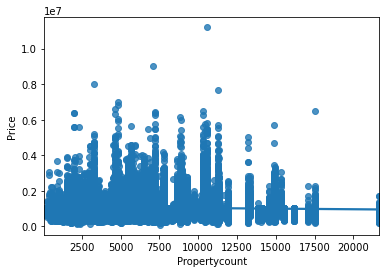

In [45]:
data = dataset.drop(['Suburb','Type','Method','SellerG','Regionname','CouncilArea'],axis = 1)
for i in data:
    sns.regplot(x = i,y = 'Price',data = dataset)
    plt.show()

### Line Plot

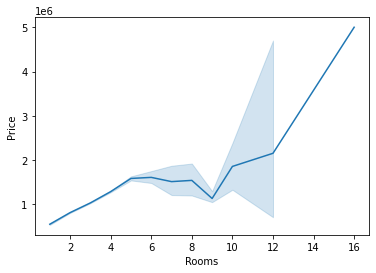

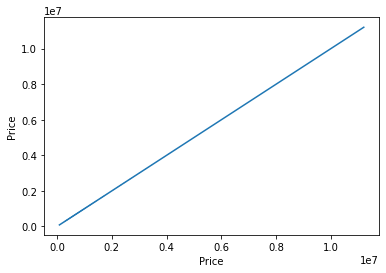

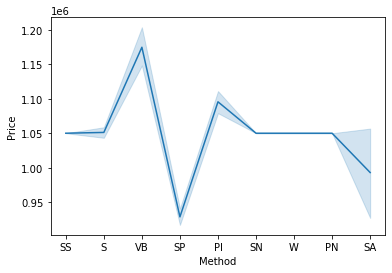

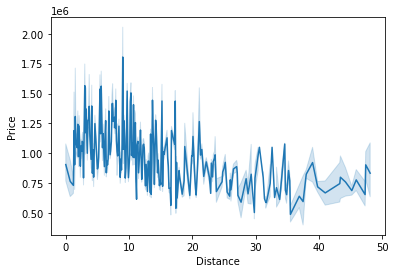

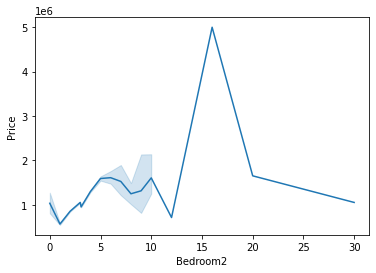

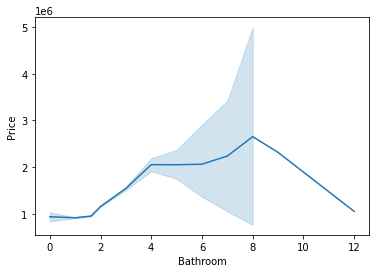

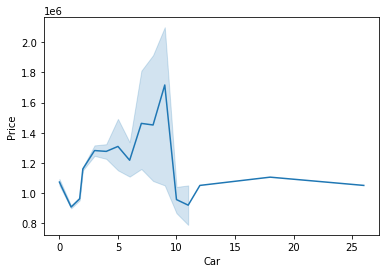

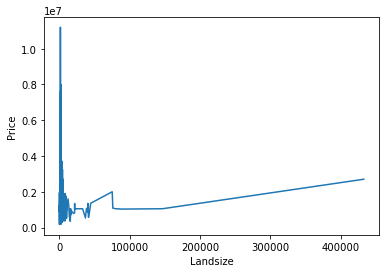

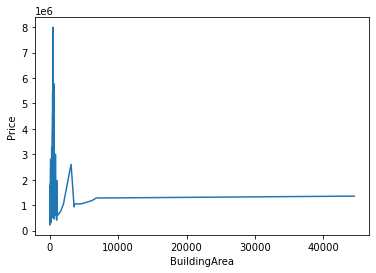

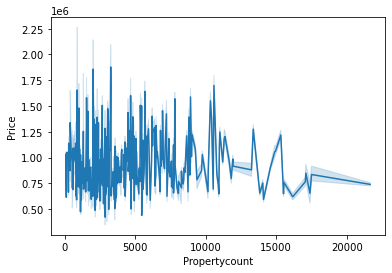

In [15]:
data = dataset.drop(['Suburb','Type','SellerG','Regionname','CouncilArea'],axis = 1)
for i in data:
    sns.lineplot(x = i,y = 'Price',data = dataset)
    plt.show()

### Categorical Plot

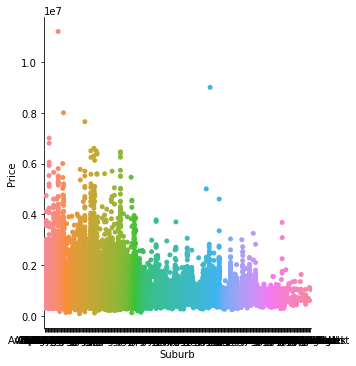

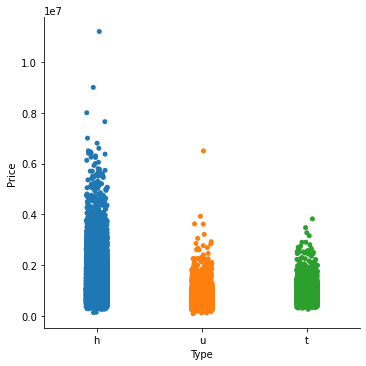

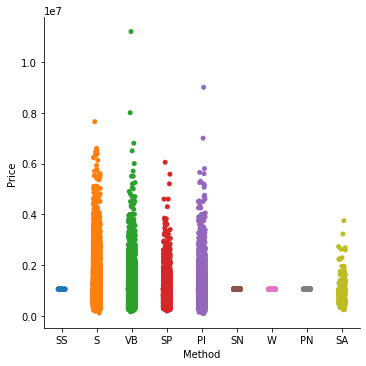

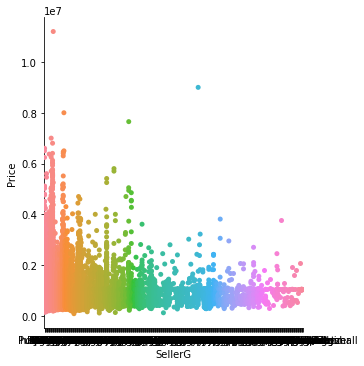

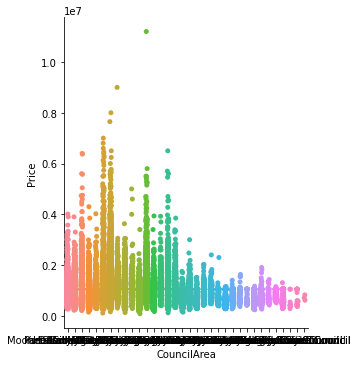

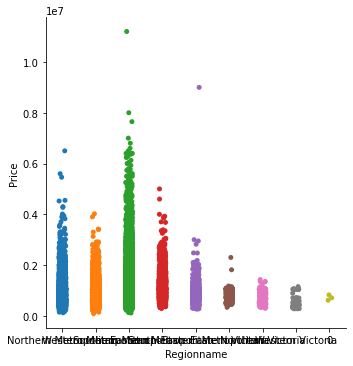

In [16]:
df = dataset.drop(['Rooms','Price','Distance','Bedroom2','Bathroom','Car','Landsize','BuildingArea','Propertycount'],axis=1)
for i in df:
    sns.catplot(x = i,y = 'Price',data = dataset)
    plt.show()

## Encoding Categorical Data

In [17]:
dataset = pd.get_dummies(dataset)
dataset

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Propertycount,Suburb_Abbotsford,...,CouncilArea_Yarra Ranges Shire Council,Regionname_0,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,2,1.050173e+06,2.5,2.000000,1.000000,1.000000,126.000000,160.2564,4019.0,1,...,0,0,0,0,1,0,0,0,0,0
1,2,1.480000e+06,2.5,2.000000,1.000000,1.000000,202.000000,160.2564,4019.0,1,...,0,0,0,0,1,0,0,0,0,0
2,2,1.035000e+06,2.5,2.000000,1.000000,0.000000,156.000000,79.0000,4019.0,1,...,0,0,0,0,1,0,0,0,0,0
3,3,1.050173e+06,2.5,3.000000,2.000000,1.000000,0.000000,160.2564,4019.0,1,...,0,0,0,0,1,0,0,0,0,0
4,3,1.465000e+06,2.5,3.000000,2.000000,0.000000,134.000000,150.0000,4019.0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,4,1.480000e+06,6.3,4.000000,1.000000,3.000000,593.000000,160.2564,6543.0,0,...,0,0,0,0,0,0,0,0,1,0
34853,2,8.880000e+05,6.3,2.000000,2.000000,1.000000,98.000000,104.0000,6543.0,0,...,0,0,0,0,0,0,0,0,1,0
34854,2,7.050000e+05,6.3,2.000000,1.000000,2.000000,220.000000,120.0000,6543.0,0,...,0,0,0,0,0,0,0,0,1,0
34855,3,1.140000e+06,6.3,3.084647,1.624798,1.728845,593.598993,160.2564,6543.0,0,...,0,0,0,0,0,0,0,0,1,0


In [18]:
x = dataset.drop('Price',axis = 1)

In [19]:
y = dataset['Price']

## Splitting the dataset into the Training set and Test set

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

## Training the Multiple Linear Regression model on the Training set

In [21]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

## Predicting the Test set Results

In [22]:
y_pred = reg.predict(x_test)

## Model Score on Training data

In [23]:
reg.score(x_train,y_train)

0.49834826864012594

## Model Score on Test data

In [24]:
reg.score(x_test,y_test)

0.4342399952661474

## regularization

In [25]:
from sklearn.linear_model import Lasso

In [26]:
clf = Lasso(alpha=0.9,tol=0.05,max_iter=100000000)
clf.fit(x_train,y_train)

Lasso(alpha=0.9, max_iter=100000000, tol=0.05)

### Model Score on Training Data after regularization

In [27]:
clf.score(x_train,y_train)

0.4983350067820811

### Model Score on Test Data after regularization

In [28]:
clf.score(x_test,y_test)

0.4346439420071969